# Data Discovery



In [7]:
# Watch out! Python 3.0 in action
# Feel like using python 2.7? Run this cell
from __future__ import print_function

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

file_name = 'dataset_mood_smartphone.csv'

# Checking simple stats

In [3]:
df = pd.read_csv(file_name)

df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.000
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.000
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.000
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.000
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.000


In [4]:
print(list(df))  # columns
print(df.shape)  # size

['Unnamed: 0', 'id', 'time', 'variable', 'value']
(376912, 5)


## Formatting time

In [30]:
def classifier(row):
    hours = int(row['hours'])
    if 6 <= hours < 12:
        return "morning"
    elif 12 <= hours < 18:
        return "afternoon" 
    elif 18 <= hours:
        return "evening"
    else:
        return "night"
    
df['day'] = df['time'].map(lambda x: datetime.strptime(str(x)[:10], '%Y-%m-%d'))
# df['hoursminutes'] = df['time'].map(lambda x: str(x)[11:])
df['hours'] = df['time'].map(lambda x: str(x)[11:13])
df["class"] = df.apply(classifier, axis=1)
df

,id,time,variable,value,day,hours,class
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26,13,afternoon
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26,15,afternoon
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26,18,evening
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26,21,evening
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27,09,morning
5,AS14.01,2014-02-27 12:00:00.000,mood,6.000,2014-02-27,12,afternoon
6,AS14.01,2014-02-27 15:00:00.000,mood,7.000,2014-02-27,15,afternoon
7,AS14.01,2014-03-21 09:00:00.000,mood,6.000,2014-03-21,09,morning
8,AS14.01,2014-03-21 11:00:00.000,mood,6.000,2014-03-21,11,morning
9,AS14.01,2014-03-21 15:00:00.000,mood,7.000,2014-03-21,15,afternoon


In [75]:
hours = 10
if 6 <= hours < 12:
    print(1)

1


## Remove unnecessary column 

In [6]:
for col in list(df):
    print("Column '%s' has %s unique values" % (col, len(np.unique(np.array(list(df[col]))))))
    
# Apparently there are
# 27 users
# 19 variables

# Column 'Unnamed: 0' is dropped because it is an index column
if 'Unnamed: 0' in list(df):
    del df['Unnamed: 0']
df

Column 'Unnamed: 0' has 376912 unique values
Column 'id' has 27 unique values
Column 'time' has 336907 unique values
Column 'variable' has 19 unique values
Column 'value' has 130808 unique values
Column 'day' has 113 unique values
Column 'hours' has 24 unique values
Column 'class' has 4 unique values


,id,time,variable,value,day,hours,class
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26,13,afternoon
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26,15,afternoon
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26,18,evening
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26,21,evening
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27,09,morning
5,AS14.01,2014-02-27 12:00:00.000,mood,6.000,2014-02-27,12,afternoon
6,AS14.01,2014-02-27 15:00:00.000,mood,7.000,2014-02-27,15,afternoon
7,AS14.01,2014-03-21 09:00:00.000,mood,6.000,2014-03-21,09,morning
8,AS14.01,2014-03-21 11:00:00.000,mood,6.000,2014-03-21,11,morning
9,AS14.01,2014-03-21 15:00:00.000,mood,7.000,2014-03-21,15,afternoon


## Stats per variable

In [7]:
# Show tipical 'variable' values
variable_stats = df[['id', 'variable', 'value']].groupby(['variable']).agg(['count', 'sum', 'mean', 'std', 'min', 'max'])
#df[['id', 'variable', 'value']].groupby(['id', 'variable']).agg([np.sum, np.mean, np.std])

variable_stats

value                                                   \
                      count           sum        mean         std        min   
variable                                                                       
activity              22965  2.662986e+03    0.115958    0.186946      0.000   
appCat.builtin        91288  1.692321e+06   18.538262  415.989243 -82798.871   
appCat.communication  74276  3.219404e+06   43.343792  128.912750      0.006   
appCat.entertainment  27125  1.019262e+06   37.576480  262.960476     -0.011   
appCat.finance          939  2.042818e+04   21.755251   39.218361      0.131   
appCat.game             813  1.043824e+05  128.391615  327.145246      1.003   
appCat.office          5642  1.273901e+05   22.578892  449.601382      0.003   
appCat.other           7650  1.974529e+05   25.810839  112.781355      0.014   
appCat.social         19145  1.386134e+06   72.401906  261.551846      0.094   
appCat.travel          2846  1.301500e+05   45.730850  246.109307      0.080   
appCat.unknown          939  4.277427e+04   45.553006  119.400405      0.111   
appCat.utilities       2487  4.610289e+04   18.537552   60.959134      0.246   
appCat.weather          255  5.137922e+03   20.148714   24.943431      1.003   
call                   5239  5.239000e+03    1.000000    0.000000      1.000   
circumplex.arousal     5597 -5.520000e+02   -0.098624    1.051868     -2.000   
circumplex.valence     5487  3.774000e+03    0.687808    0.671298     -2.000   
mood                   5641  3.944500e+04    6.992555    1.032769      1.000   
screen                96578  7.275723e+06   75.335206  253.822497      0.035   
sms                    1798  1.798000e+03    1.000000    0.000000      1.000   

                                 
                            max  
variable                         
activity                  1.000  
appCat.builtin        33960.246  
appCat.communication   9830.777  
appCat.entertainment  32148.677  
appCat.finance          355.513  
appCat.game            5491.793  
appCat.office         32708.818  
appCat.other           3892.038  
appCat.social         30000.906  
appCat.travel         10452.615  
appCat.unknown         2239.937  
appCat.utilities       1802.649  
appCat.weather          344.863  
call                      1.000  
circumplex.arousal        2.000  
circumplex.valence        2.000  
mood                     10.000  
screen                 9867.007  
sms                       1.000

### Typical 'variable' values

In alphabetic order:
- activity
    - 'activity score'
    - values between 0 and 1
    - mean is quit low: 0.11 and std is not that much 0.18, so most activity is small
- appCat.builtin
    - 'duration of usage of builtin apps'
    - there are negative values(?!)
    - probably not interesting(?)
- appCat.communication
    - 'duration of usage of communiction apps'
- appCat.entertainment
    - 'duration of usage of entertainment apps'
    - mean is higher than appCat.communication
    - again a negative value
- appCat.finance
    - 'duration of usage of finance apps'
- appCat.game
    - 'duration of usage of game apps'
- appCat.office
    - 'duration of usage of office apps'
- appCat.other
    - 'duration of usage of other apps'
- appCat.social
    - 'duration of usage of social apps'
- appCat.travel
    - 'duration of usage of travel apps'
- appCat.unkown
    - 'duration of usage of unkown apps'
- appCat.utilities
    - 'duration of usage of utilities apps'
- appCat.weather
    - 'duration of usage of weather apps'
    - who uses weather apps on average 20 minutes(?) a day(?)
- call
    - Call made (always a 1)
- circumplex.arousal
    - 'the arousal scored by the user'
    - between -2 and 2
    - mean around 0, high std ~1.
- circumplex.valence
    - 'the valence score by the user'
    - between -2 and 2
    - bias to positive numbers, mean 0.7 and std 0.7
- mood
    - 'the mood scored by the user'
    - between 1 and 10
    - average around 7 (suprise suprise), stdev 0.1 (so most score are inbetween 6-8)
- screen
    - 'duration of screen activity'
- sms
    - sms sent (always a 1)

Note for all 'appCat' variables, I (Cor) guess time is in minutes, not sure though.

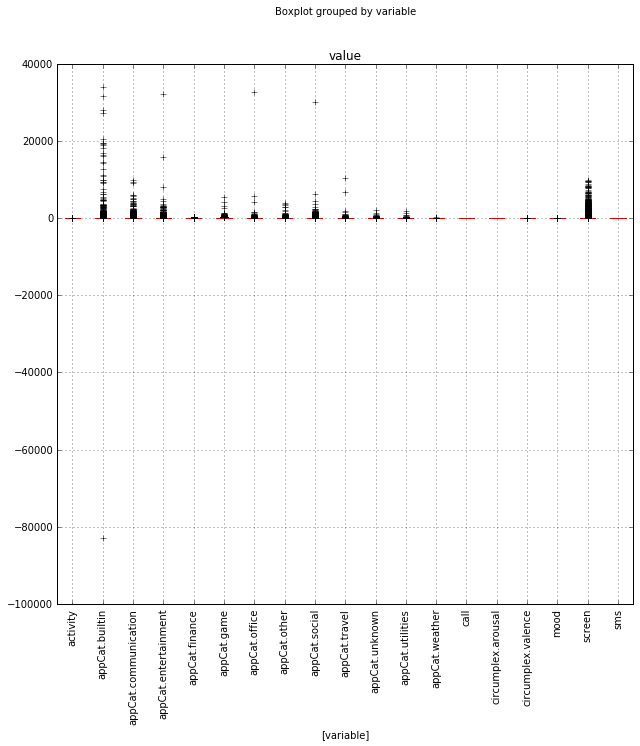

In [8]:
df.boxplot(by='variable', figsize=(10, 10), rot=90)

## Removing wrong variable values

The appCat variables measure time, thus this variable can not be negative.

In [9]:
# drop the outlier in appCat.builtin
df = df[(df['variable'] == 'appCat.builtin') & (df['value'] > 0) | (df['variable'] != 'appCat.builtin')]
df = df[(df['variable'] == 'appCat.entertainment') & (df['value'] > 0) | (df['variable'] != 'appCat.entertainment')]

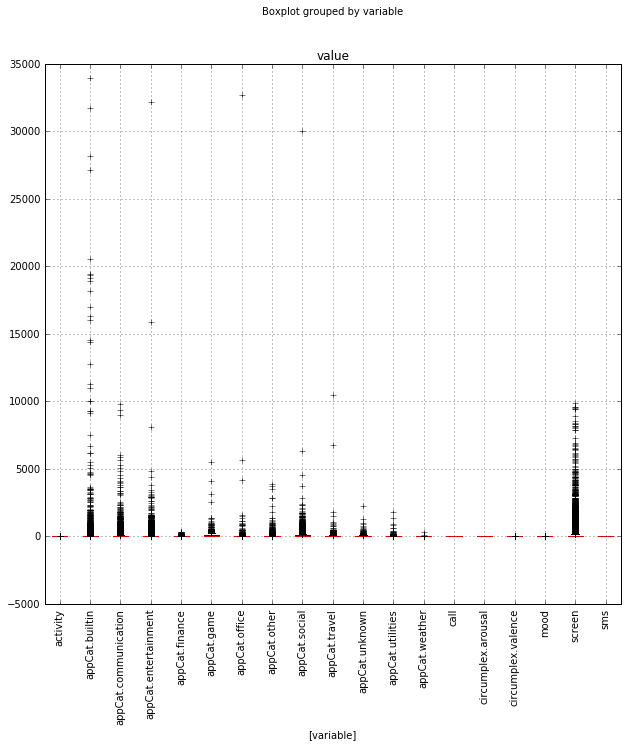

In [10]:
df.boxplot(by='variable', figsize=(10, 10), rot=90)

In [11]:
# Check if it worked:
df[['id', 'variable', 'value']].groupby(['variable']).agg(['count', 'sum', 'mean', 'std', 'min', 'max'])

value                                               \
                      count           sum        mean         std    min   
variable                                                                   
activity              22965  2.662986e+03    0.115958    0.186946  0.000   
appCat.builtin        91285  1.775166e+06   19.446411  312.914956  0.001   
appCat.communication  74276  3.219404e+06   43.343792  128.912750  0.006   
appCat.entertainment  27124  1.019262e+06   37.577866  262.965225  0.001   
appCat.finance          939  2.042818e+04   21.755251   39.218361  0.131   
appCat.game             813  1.043824e+05  128.391615  327.145246  1.003   
appCat.office          5642  1.273901e+05   22.578892  449.601382  0.003   
appCat.other           7650  1.974529e+05   25.810839  112.781355  0.014   
appCat.social         19145  1.386134e+06   72.401906  261.551846  0.094   
appCat.travel          2846  1.301500e+05   45.730850  246.109307  0.080   
appCat.unknown          939  4.277427e+04   45.553006  119.400405  0.111   
appCat.utilities       2487  4.610289e+04   18.537552   60.959134  0.246   
appCat.weather          255  5.137922e+03   20.148714   24.943431  1.003   
call                   5239  5.239000e+03    1.000000    0.000000  1.000   
circumplex.arousal     5597 -5.520000e+02   -0.098624    1.051868 -2.000   
circumplex.valence     5487  3.774000e+03    0.687808    0.671298 -2.000   
mood                   5641  3.944500e+04    6.992555    1.032769  1.000   
screen                96578  7.275723e+06   75.335206  253.822497  0.035   
sms                    1798  1.798000e+03    1.000000    0.000000  1.000   

                                 
                            max  
variable                         
activity                  1.000  
appCat.builtin        33960.246  
appCat.communication   9830.777  
appCat.entertainment  32148.677  
appCat.finance          355.513  
appCat.game            5491.793  
appCat.office         32708.818  
appCat.other           3892.038  
appCat.social         30000.906  
appCat.travel         10452.615  
appCat.unknown         2239.937  
appCat.utilities       1802.649  
appCat.weather          344.863  
call                      1.000  
circumplex.arousal        2.000  
circumplex.valence        2.000  
mood                     10.000  
screen                 9867.007  
sms                       1.000

# Plotting the mood

In [31]:
person_id = 'AS14.01'
person_mood = df[(df['variable'] == 'mood') & (df['id'] == person_id)]

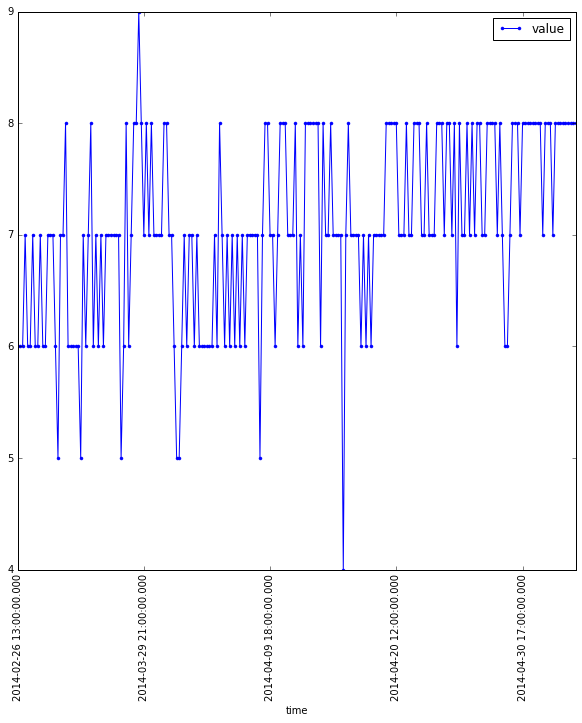

In [32]:
person_mood.plot(x='time', y='value', marker='.', rot=90, figsize=(10, 10))

AS14.01


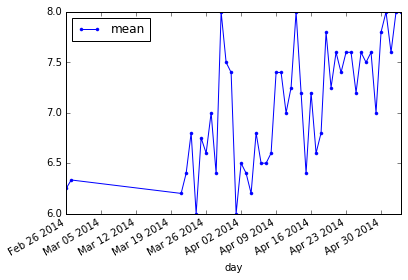

AS14.02


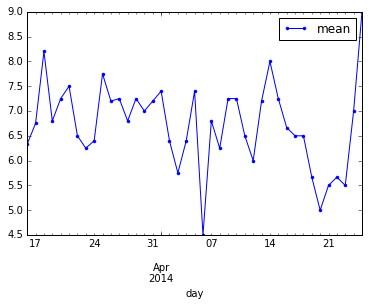

AS14.03


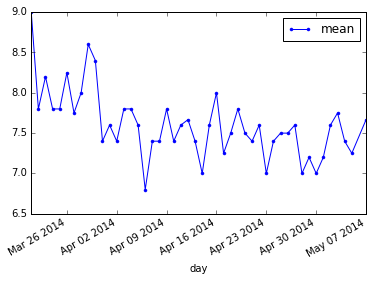

AS14.05


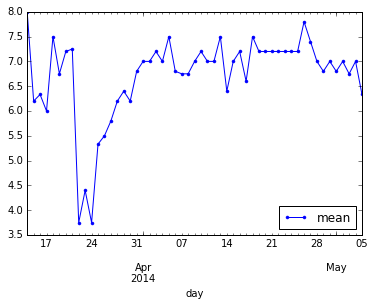

AS14.06


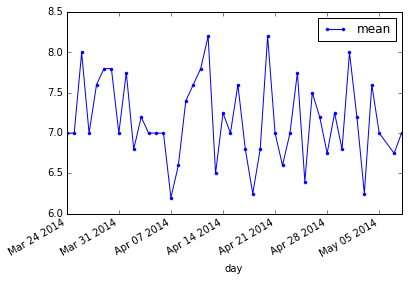

AS14.07


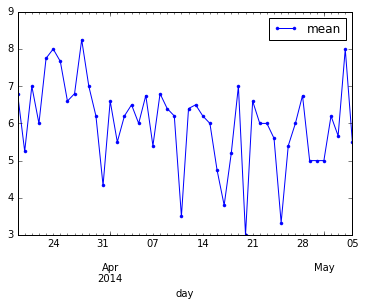

AS14.08


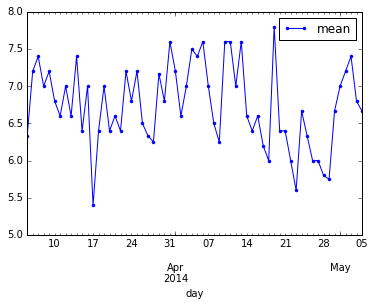

AS14.09


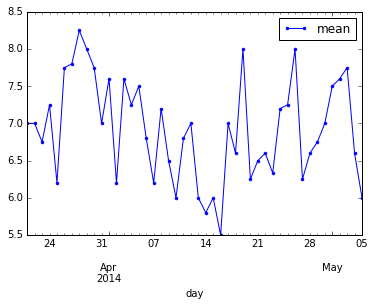

AS14.12


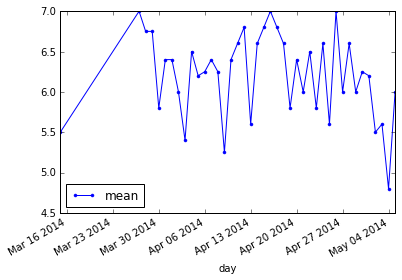

AS14.13


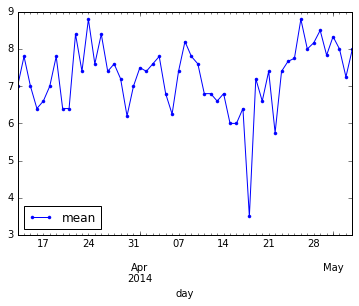

AS14.14


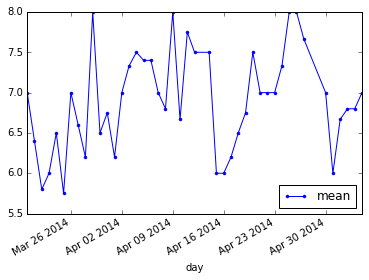

AS14.15


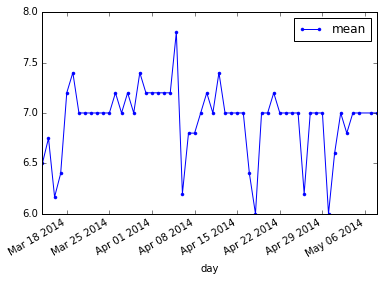

AS14.16


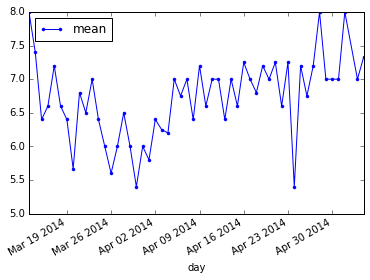

AS14.17


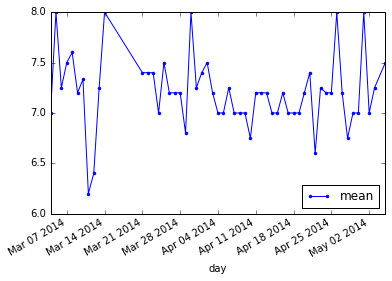

AS14.19


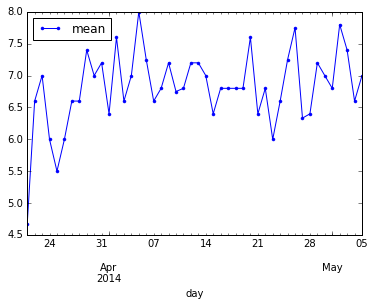

AS14.20


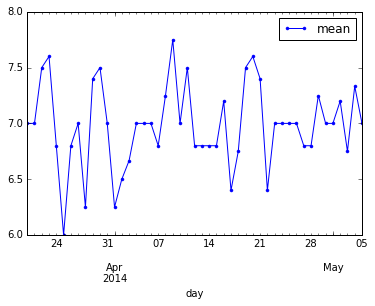

AS14.23


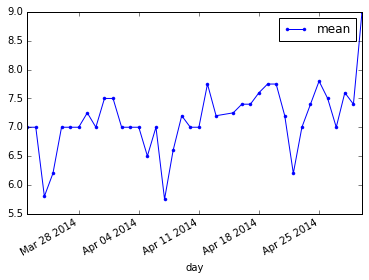

AS14.24


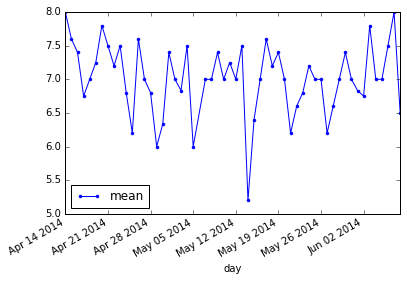

AS14.25


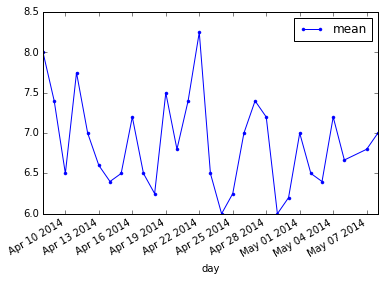

AS14.26


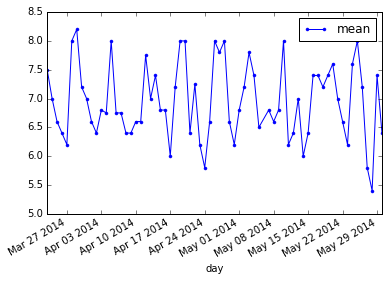

AS14.27


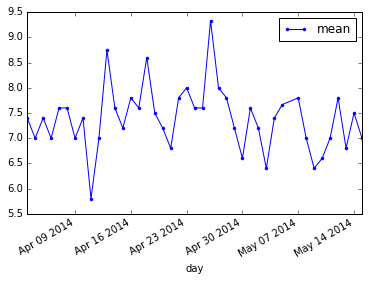

AS14.28


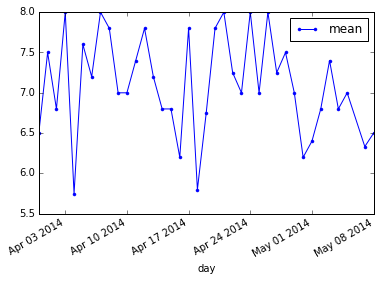

AS14.29


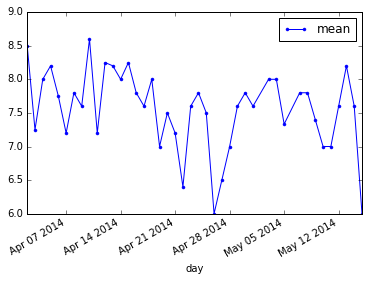

AS14.30


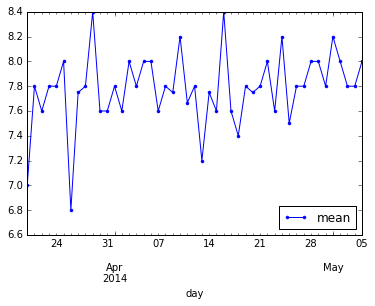

AS14.31


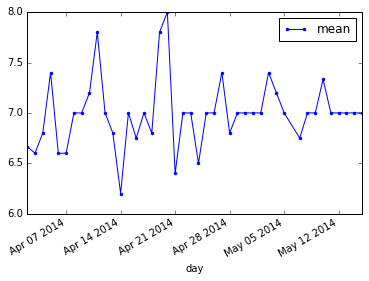

AS14.32


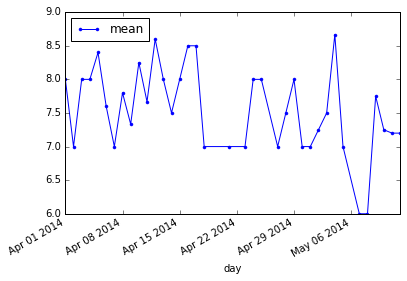

AS14.33


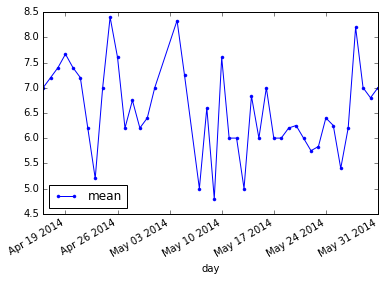

In [73]:
# person_mood.groupby(['day']).agg(['count', 'sum', 'mean', 'std', 'min', 'max'])
for person_id in np.unique(list(df['id'])):
    print(person_id)
    person_mood = df[(df['variable'] == 'mood') & (df['id'] == person_id)]
    avg_person_mood = person_mood.groupby(['day']).agg(['mean'])['value']
    avg_person_mood.plot(marker='.')
    plt.show()
    
    del person_mood, avg_person_mood

KeyError: 'day'

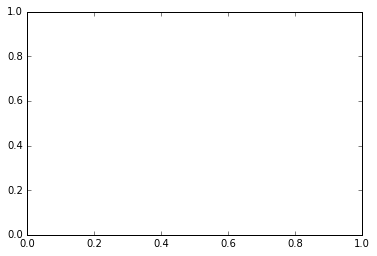

In [77]:
ax1 = plt.subplot(111)
person_mood = df[(df['variable'] == 'mood') & (df['id'] == person_id)]
avg_person_mood = person_mood.groupby(['day']).agg(['mean'])['value']
dates = avg_person_mood['day'].tolist()
plt.plot(avg_person_mood['day'], avg_person_mood['mean'])